In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

data_2019 = pd.read_csv("./KR_TB_TR_STN_DAY_CON_20190101_20190531_UTF8.csv")
data_2020 = pd.read_csv("./KR_TB_TR_STN_DAY_CON_20200101_20200531_UTF8.csv")

In [2]:
data_2019

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB
0,20190101,924,송도교,1,-
1,20190101,3900023,서울,"35,964","53,079"
2,20190101,3900025,용산,"19,207","26,238"
3,20190101,3900030,영등포,"11,573","11,538"
4,20190101,3900039,안양,415,348
...,...,...,...,...,...
36713,20190531,3901063,인천공항T2,154,270
36714,20190531,3901065,월포,14,44
36715,20190531,3901066,장사,17,18
36716,20190531,3901067,강구,19,29


In [3]:
data_2020

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB
0,20200101,924,송도교,2,-
1,20200101,3900023,서울,"38,306","50,440"
2,20200101,3900025,용산,"19,702","23,967"
3,20200101,3900030,영등포,"10,812","11,125"
4,20200101,3900039,안양,387,269
...,...,...,...,...,...
35035,20200531,3901063,인천공항T2,1,-
35036,20200531,3901065,월포,31,14
35037,20200531,3901066,장사,5,6
35038,20200531,3901067,강구,33,9


In [6]:
df = pd.DataFrame(data_2019)

def remove_comma(x):
    return x.replace(',','')


df['ABRD_PRNB'] = df[' ABRD_PRNB '].str.slice(start=1, stop=-1)

df['ABRD_PRNB'] = df['ABRD_PRNB'].apply(remove_comma)

df['ABRD_PRNB_len'] = df['ABRD_PRNB'].str.len()

df = df.replace({'ABRD_PRNB': "-"}, {'ABRD_PRNB': 0})

df['ABRD_PRNB_int'] = pd.to_numeric(df['ABRD_PRNB'])

df = df.drop('ABRD_PRNB' , axis = 1)


df['GOFF_PRNB'] = df[' GOFF_PRNB '].str.slice(start=1, stop=-1)

df['GOFF_PRNB'] = df['GOFF_PRNB'].apply(remove_comma)

df['GOFF_PRNB_len'] = df['GOFF_PRNB'].str.len()

df = df.replace({'GOFF_PRNB': "-"}, {'GOFF_PRNB': 0})

df['GOFF_PRNB_int'] = pd.to_numeric(df['GOFF_PRNB'])

df = df.drop('GOFF_PRNB' , axis = 1)
""""""

def is_monday(x):
    year = x // 10000
    month = (x % 10000) // 100
    day = x % 100
    return calendar.weekday(year, month, day)
    
def Seoul_to_Busan(n):
    
        KTX_KyungBu = df[df['STN_CD_NM'].isin(['행신','서울','영등포','광명','수원','오송','천안아산','대전','김천구미','동대구','신경주','밀양','구포','울산','부산'])]
        weekly_go = []
        price = {'행신' : 61100 , '서울' : 59800, '영등포' : 48000 , '수원' : 46300, '광명' : 57700, '천안아산' : 46500 , '오송' : 42200, '대전' : 36200, '김천구미' :24900, '동대구' :17100, '신경주' : 11100, '밀양' : 8400, '울산' : 8400, '구포' : 8400, '부산' : 0}
        for i in range(n , n+7):
            At_day = KTX_KyungBu[KTX_KyungBu['RUN_DT'].isin([i])]
            At_day["price"] = 1
            At_day["ABRD_PRNB_price"] = 1
            At_day["price"] = At_day['STN_CD_NM']
            
            At_day = At_day.replace({'price': '행신'}, {'price': 6.1100})
            At_day = At_day.replace({'price': '서울'}, {'price': 5.9800})
            At_day = At_day.replace({'price': '영등포'}, {'price': 4.8000})
            At_day = At_day.replace({'price': '광명'}, {'price': 5.7700})
            At_day = At_day.replace({'price': '수원'}, {'price': 4.6300})
            At_day = At_day.replace({'price': '오송'}, {'price': 4.2200})
            At_day = At_day.replace({'price': '천안아산'}, {'price': 4.6500})
            At_day = At_day.replace({'price': '대전'}, {'price': 3.6200})
            At_day = At_day.replace({'price': '김천구미'}, {'price': 2.4900})
            At_day = At_day.replace({'price': '동대구'}, {'price': 1.7100})
            At_day = At_day.replace({'price': '신경주'}, {'price': 1.1100})
            At_day = At_day.replace({'price': '울산'}, {'price': .8400})
            At_day = At_day.replace({'price': '밀양'}, {'price': .8400})
            At_day = At_day.replace({'price': '구포'}, {'price': .8400})
            At_day = At_day.replace({'price': '부산'}, {'price': 0})
            At_day['price'] = pd.to_numeric(At_day['price'])
            
            
            At_day["ABRD_PRNB_price"] = At_day["price"]*At_day["ABRD_PRNB_int"]
            
            sum_only = At_day["ABRD_PRNB_int"].sum(axis=0)
            sum_only1 = At_day["GOFF_PRNB_int"].sum(axis=0)
            
            sum_multipled = At_day["ABRD_PRNB_price"].sum(axis=0)
            
            
            is_seoul = At_day[At_day['STN_CD_NM'].isin(['서울'])]
            seoul_in = is_seoul["ABRD_PRNB_int"].values

            
            is_busan = At_day[At_day['STN_CD_NM'].isin(['부산'])]
            busan_out = is_busan["GOFF_PRNB_int"].values

            
            seoul_busan = ((busan_out[0]) / sum_only1) * seoul_in[0]
            weekly_go.append(int(seoul_busan))
            print(seoul_in)
            
        
        return weekly_go
    
Seoul_to_Busan_week = Seoul_to_Busan(20190310)
dayday = ['2019-03-10', '2019-03-11' , '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-16']
print(Seoul_to_Busan_week)


[43693]
[40121]
[38816]
[39356]
[41752]
[57012]
[53831]
[3927, 3435, 3370, 3365, 3549, 5655, 6217]


<ipython-input-6-c35bea3f3807>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  At_day["price"] = 1
<ipython-input-6-c35bea3f3807>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  At_day["ABRD_PRNB_price"] = 1
<ipython-input-6-c35bea3f3807>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [33]:
abc2019 = np.array([43693, 40121, 38816, 39356, 41752, 57012, 53831])

abc2020 = np.array([11169, 15886, 14470, 15053, 15656, 20848, 12403])


print('2019년 3월 2주 서울역 이용객 수 :',abc2019)
print('2020년 3월 2주 서울역 이용객 수 :',abc2020)
print('2019년 3월 2주 고속철도 이용객 수 :',np.around(abc2019*0.15))
print('2020년 3월 2주 고속철도 이용객 수 :',np.around(abc2020*0.15))

sum(abc2020)

2019년 3월 2주 서울역 이용객 수 : [43693 40121 38816 39356 41752 57012 53831]
2020년 3월 2주 서울역 이용객 수 : [11169 15886 14470 15053 15656 20848 12403]
2019년 3월 2주 고속철도 이용객 수 : [6554. 6018. 5822. 5903. 6263. 8552. 8075.]
2020년 3월 2주 고속철도 이용객 수 : [1675. 2383. 2170. 2258. 2348. 3127. 1860.]


105485

In [5]:
data_2020 = pd.read_csv("./KR_TB_TR_STN_DAY_CON_20200101_20200531_UTF8.csv")
df = pd.DataFrame(data_2020)


df['ABRD_PRNB'] = df[' ABRD_PRNB '].str.slice(start=1, stop=-1)

df['ABRD_PRNB'] = df['ABRD_PRNB'].apply(remove_comma)

df['ABRD_PRNB_len'] = df['ABRD_PRNB'].str.len()

df = df.replace({'ABRD_PRNB': "-"}, {'ABRD_PRNB': 0})

df['ABRD_PRNB_int'] = pd.to_numeric(df['ABRD_PRNB'])

df = df.drop('ABRD_PRNB' , axis = 1)


df['GOFF_PRNB'] = df[' GOFF_PRNB '].str.slice(start=1, stop=-1)

df['GOFF_PRNB'] = df['GOFF_PRNB'].apply(remove_comma)

df['GOFF_PRNB_len'] = df['GOFF_PRNB'].str.len()

df = df.replace({'GOFF_PRNB': "-"}, {'GOFF_PRNB': 0})

df['GOFF_PRNB_int'] = pd.to_numeric(df['GOFF_PRNB'])

df = df.drop('GOFF_PRNB' , axis = 1)



    
def Seoul_to_Busan(n):
    
        KTX_KyungBu = df[df['STN_CD_NM'].isin(['행신','서울','영등포','광명','수원','오송','천안아산','대전','김천구미','동대구','신경주','밀양','구포','울산','부산'])]
        weekly_go = []
        price = {'행신' : 61100 , '서울' : 59800, '영등포' : 48000 , '수원' : 46300, '광명' : 57700, '천안아산' : 46500 , '오송' : 42200, '대전' : 36200, '김천구미' :24900, '동대구' :17100, '신경주' : 11100, '밀양' : 8400, '울산' : 8400, '구포' : 8400, '부산' : 0}
        for i in range(n , n+7):
            At_day = KTX_KyungBu[KTX_KyungBu['RUN_DT'].isin([i])]
            At_day["price"] = 1
            At_day["ABRD_PRNB_price"] = 1
            At_day["price"] = At_day['STN_CD_NM']
            
            At_day = At_day.replace({'price': '행신'}, {'price': 6.1100})
            At_day = At_day.replace({'price': '서울'}, {'price': 5.9800})
            At_day = At_day.replace({'price': '영등포'}, {'price': 4.8000})
            At_day = At_day.replace({'price': '광명'}, {'price': 5.7700})
            At_day = At_day.replace({'price': '수원'}, {'price': 4.6300})
            At_day = At_day.replace({'price': '오송'}, {'price': 4.2200})
            At_day = At_day.replace({'price': '천안아산'}, {'price': 4.6500})
            At_day = At_day.replace({'price': '대전'}, {'price': 3.6200})
            At_day = At_day.replace({'price': '김천구미'}, {'price': 2.4900})
            At_day = At_day.replace({'price': '동대구'}, {'price': 1.7100})
            At_day = At_day.replace({'price': '신경주'}, {'price': 1.1100})
            At_day = At_day.replace({'price': '울산'}, {'price': .8400})
            At_day = At_day.replace({'price': '밀양'}, {'price': .8400})
            At_day = At_day.replace({'price': '구포'}, {'price': .8400})
            At_day = At_day.replace({'price': '부산'}, {'price': 0})
            At_day['price'] = pd.to_numeric(At_day['price'])
            
            
            At_day["ABRD_PRNB_price"] = At_day["price"]*At_day["ABRD_PRNB_int"]
            
            sum_only = At_day["ABRD_PRNB_int"].sum(axis=0)
            sum_only1 = At_day["GOFF_PRNB_int"].sum(axis=0)
            
            sum_multipled = At_day["ABRD_PRNB_price"].sum(axis=0)
            
            
            is_seoul = At_day[At_day['STN_CD_NM'].isin(['서울'])]
            seoul_in = is_seoul["ABRD_PRNB_int"].values

            
            is_busan = At_day[At_day['STN_CD_NM'].isin(['부산'])]
            busan_out = is_busan["GOFF_PRNB_int"].values

            
            seoul_busan = ((busan_out[0]) / sum_only1) * seoul_in[0]
            weekly_go.append(int(seoul_busan))
            
            print(seoul_in)
            
        print(seoul_in[0])
        return weekly_go
    
Seoul_to_Busan_week = Seoul_to_Busan(20200308)
dayday = ['2020-03-08', '2020-03-09' , '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14']
print(Seoul_to_Busan_week)



[11169]
[15886]
[14470]
[15053]
[15656]
[20848]
[12403]
12403
[941, 1074, 979, 1073, 1180, 1685, 1139]


<ipython-input-5-06c93ee8293f>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  At_day["price"] = 1
<ipython-input-5-06c93ee8293f>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  At_day["ABRD_PRNB_price"] = 1
<ipython-input-5-06c93ee8293f>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

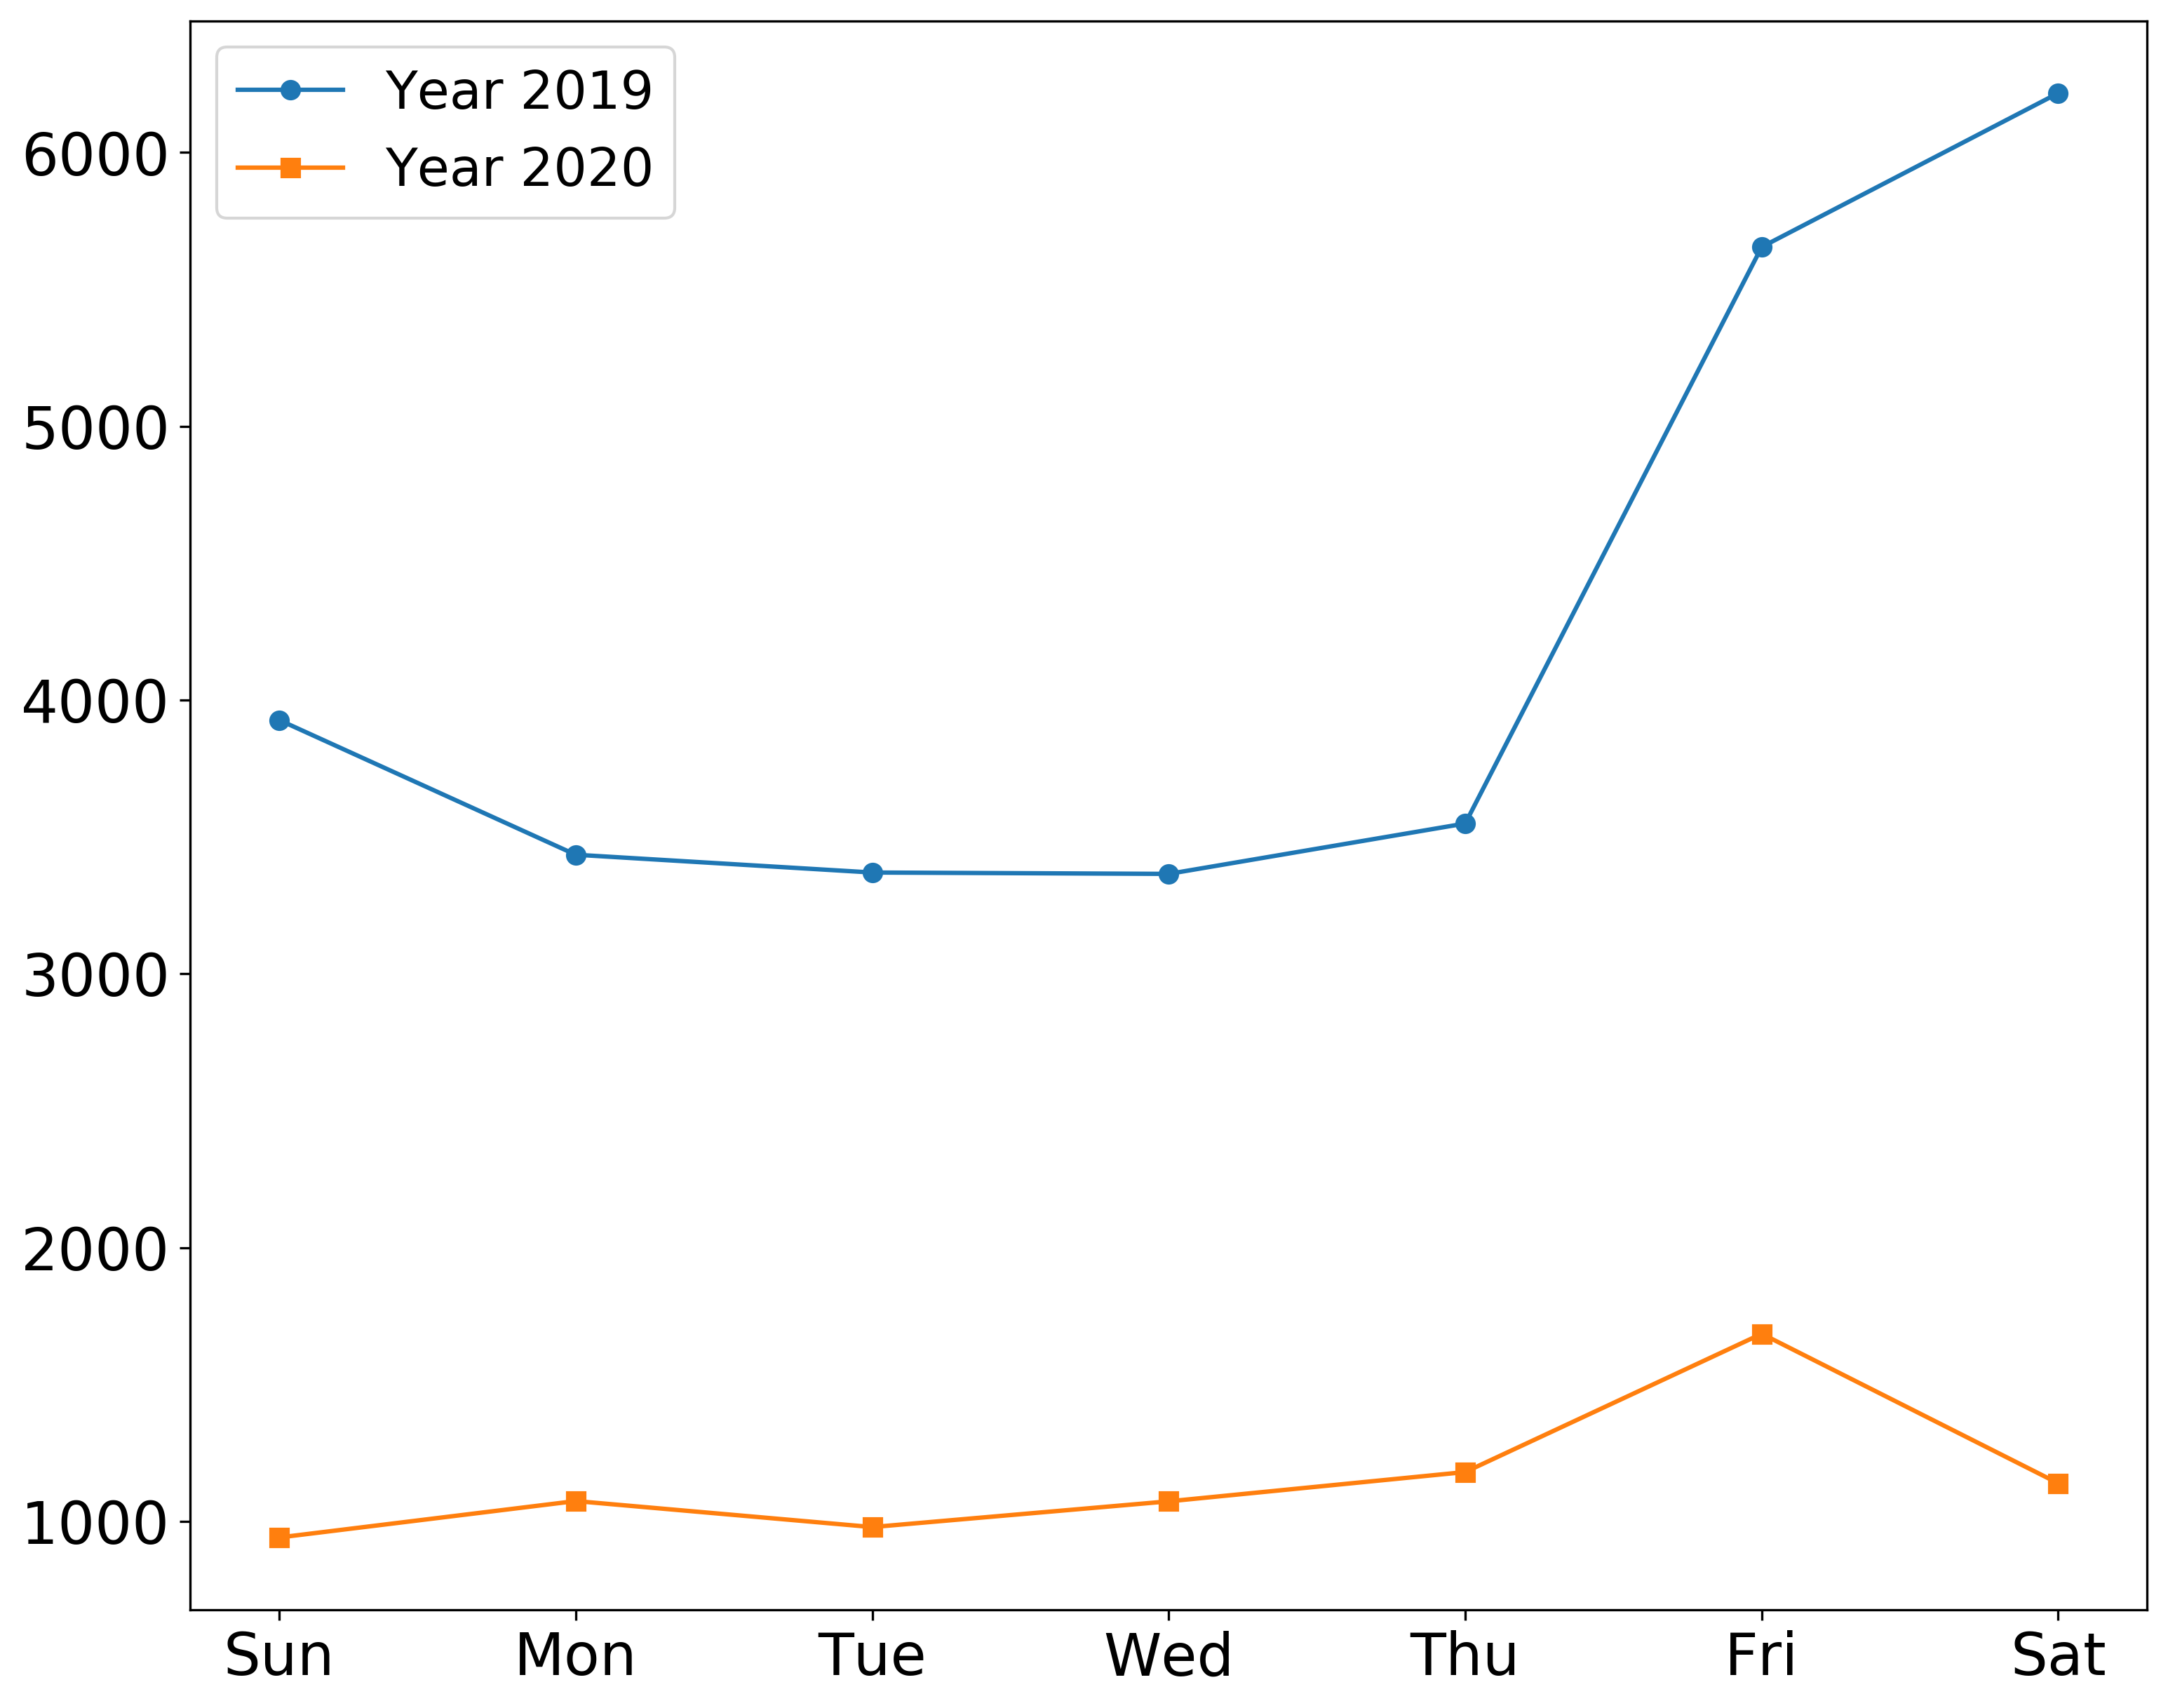

In [13]:
df_compare = pd.DataFrame(index=range(0,2), columns=['Sun', 'Mon' , 'Tue' , 'Wed', 'Thu', 'Fri', 'Sat'])
day = ['Sun', 'Mon' , 'Tue' , 'Wed', 'Thu', 'Fri', 'Sat']
df_compare = df_compare.append(pd.Series(list_2019_32, index=df_compare.columns), ignore_index=True)
df_compare = df_compare.append(pd.Series(list_2020_32, index=df_compare.columns), ignore_index=True)
df_compare = df_compare.dropna()
df_compare = df_compare.rename(index={2: 2019, 3: 2020})

plt.figure(dpi=300, figsize=(12,10))
plt.plot(day, list_2019_32, marker='o')
plt.plot(day, list_2020_32, marker='s')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['Year 2019', 'Year 2020'], fontsize=18)

plt.show()

In [7]:
df_compare

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
2019,3927,3435,3370,3365,3549,5655,6217
2020,941,1074,979,1073,1180,1685,1139


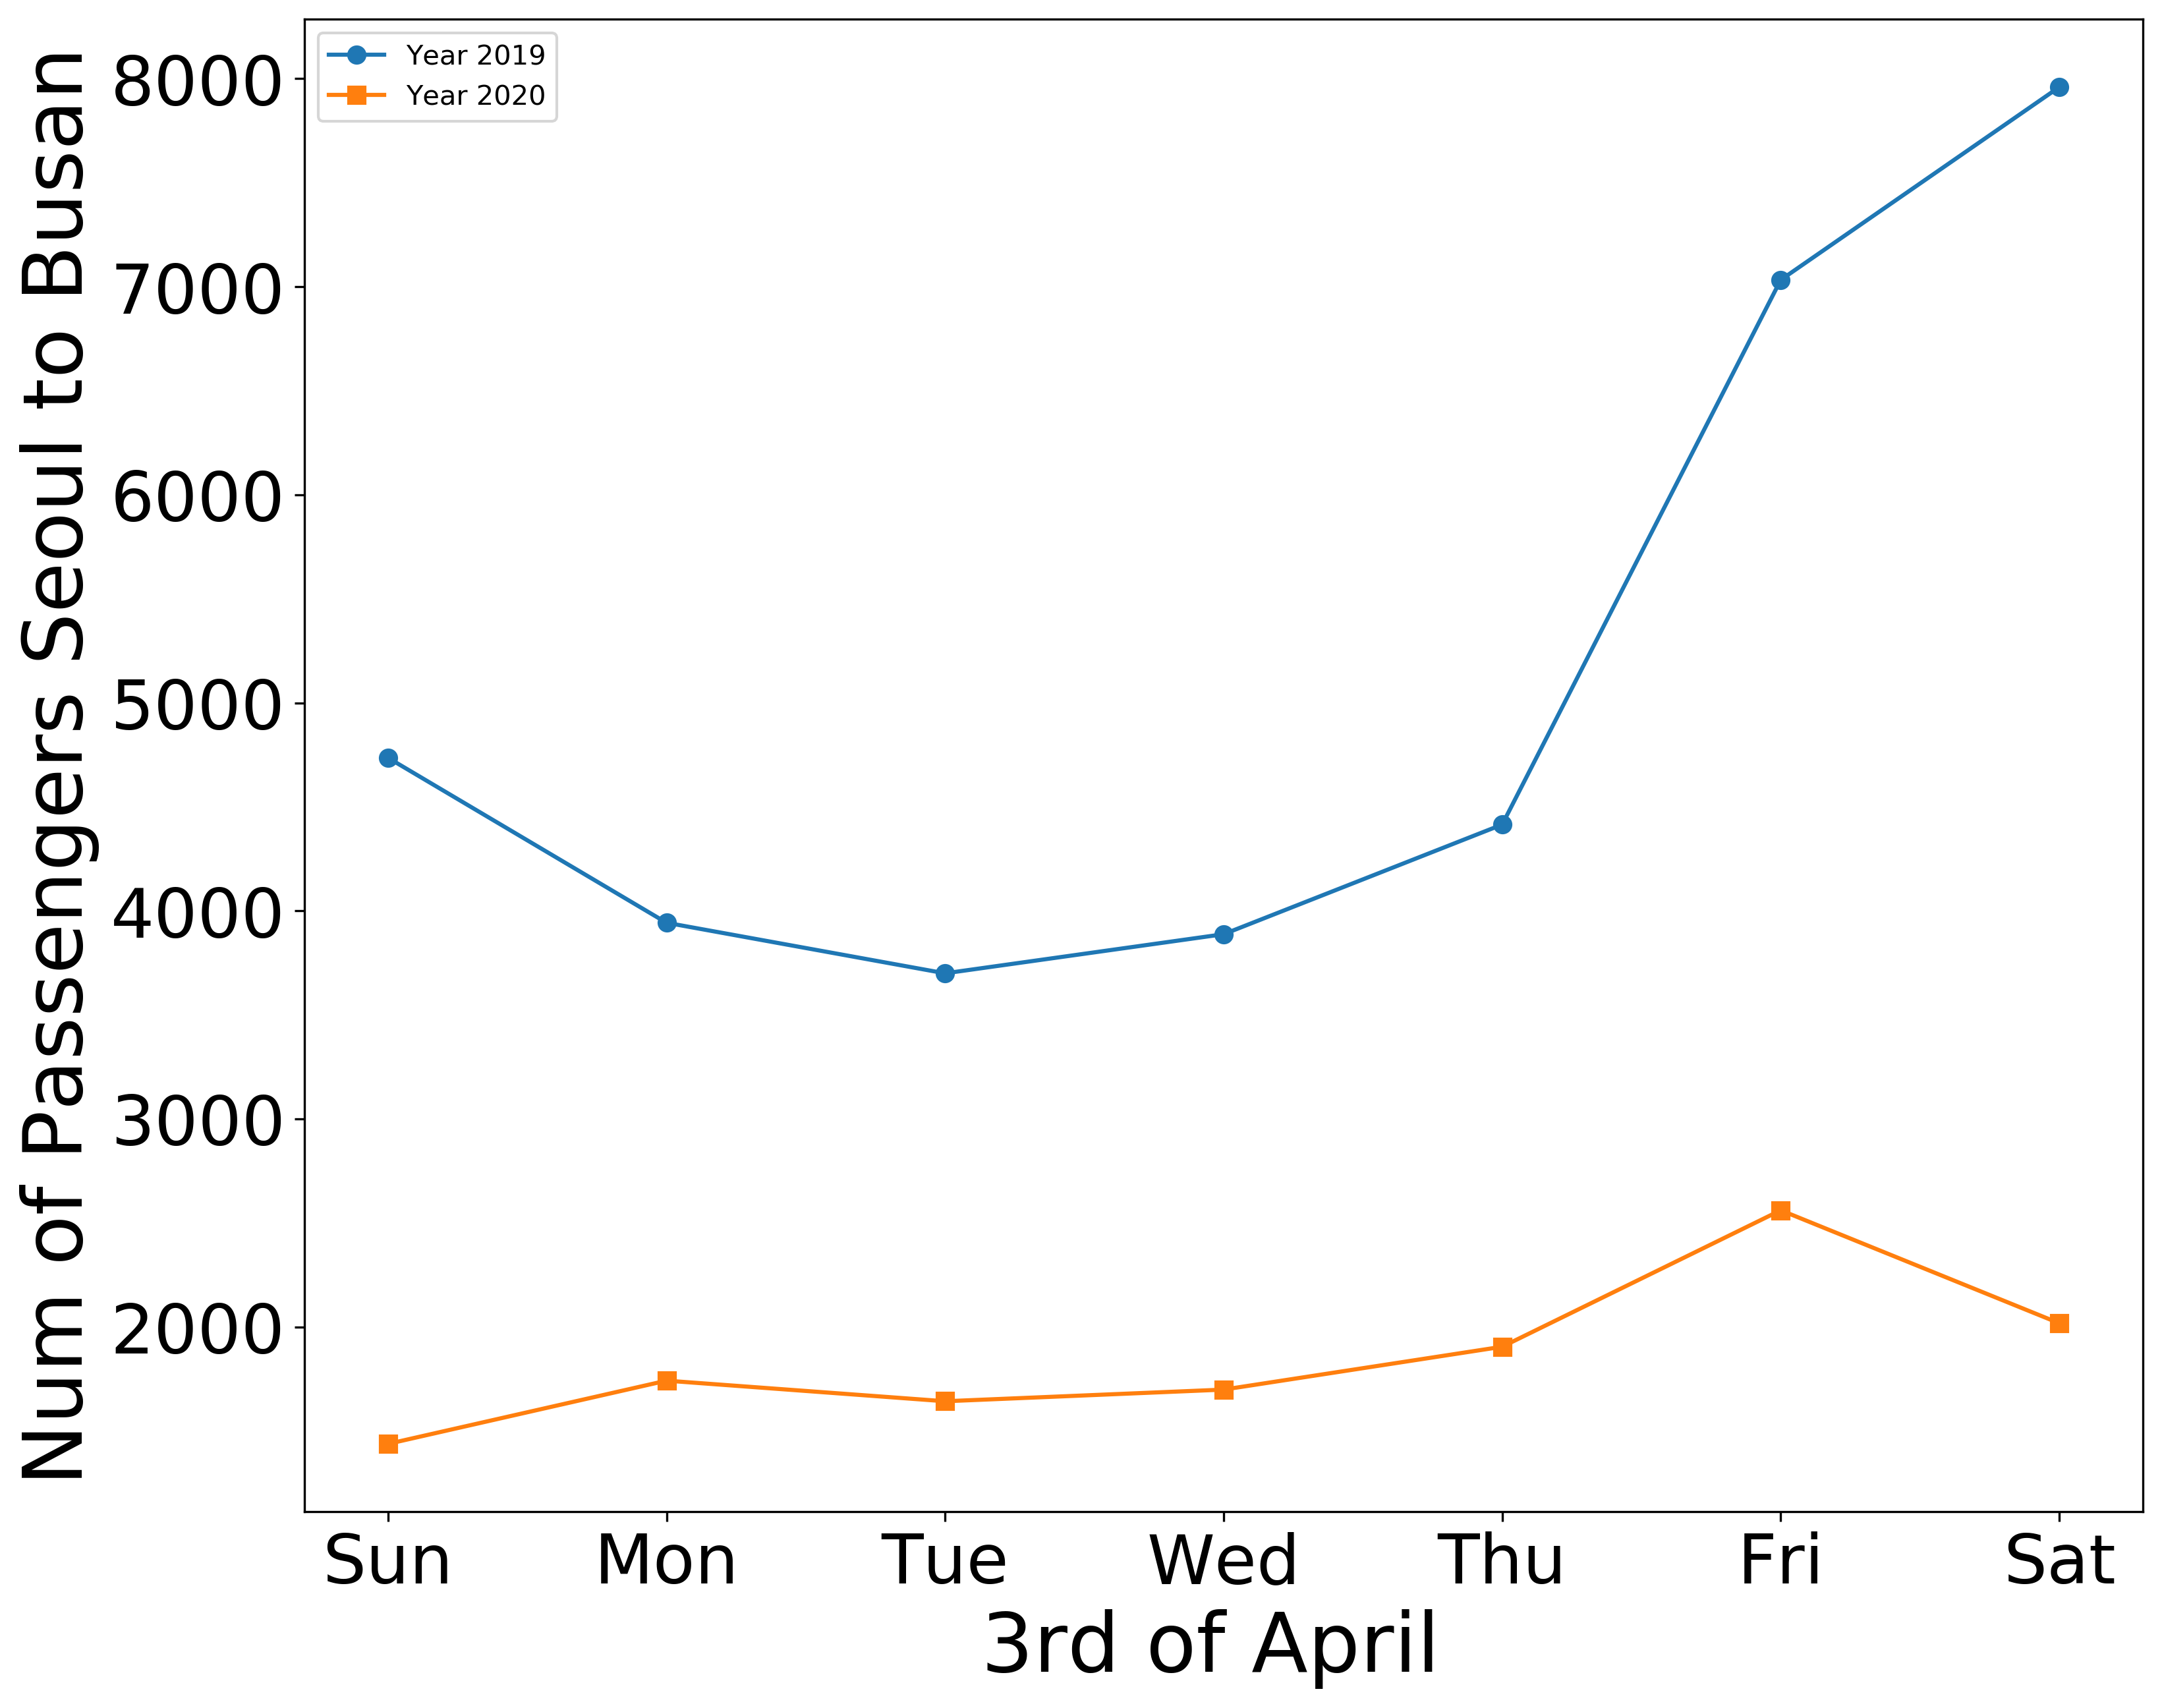

In [8]:
df_compare = pd.DataFrame(index=range(0,2), columns=['Sun', 'Mon' , 'Tue' , 'Wed', 'Thu', 'Fri', 'Sat'])
day = ['Sun', 'Mon' , 'Tue' , 'Wed', 'Thu', 'Fri', 'Sat']
df_compare = df_compare.append(pd.Series(list_2019_43, index=df_compare.columns), ignore_index=True)
df_compare = df_compare.append(pd.Series(list_2020_43, index=df_compare.columns), ignore_index=True)
df_compare = df_compare.dropna()
df_compare = df_compare.rename(index={2: 2019, 3: 2020})

plt.figure(dpi=300, figsize=(12,10))

plt.plot(day, list_2019_43, marker='o')
plt.plot(day, list_2020_43, marker='s')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('3rd of April ', fontsize=30)
plt.ylabel('Num of Passengers Seoul to Busan', fontsize=30)
plt.legend(['Year 2019', 'Year 2020'])

plt.show()

In [9]:
df_compare

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
2019,4736,3943,3700,3888,4415,7033,7960
2020,1438,1742,1643,1699,1905,2561,2018


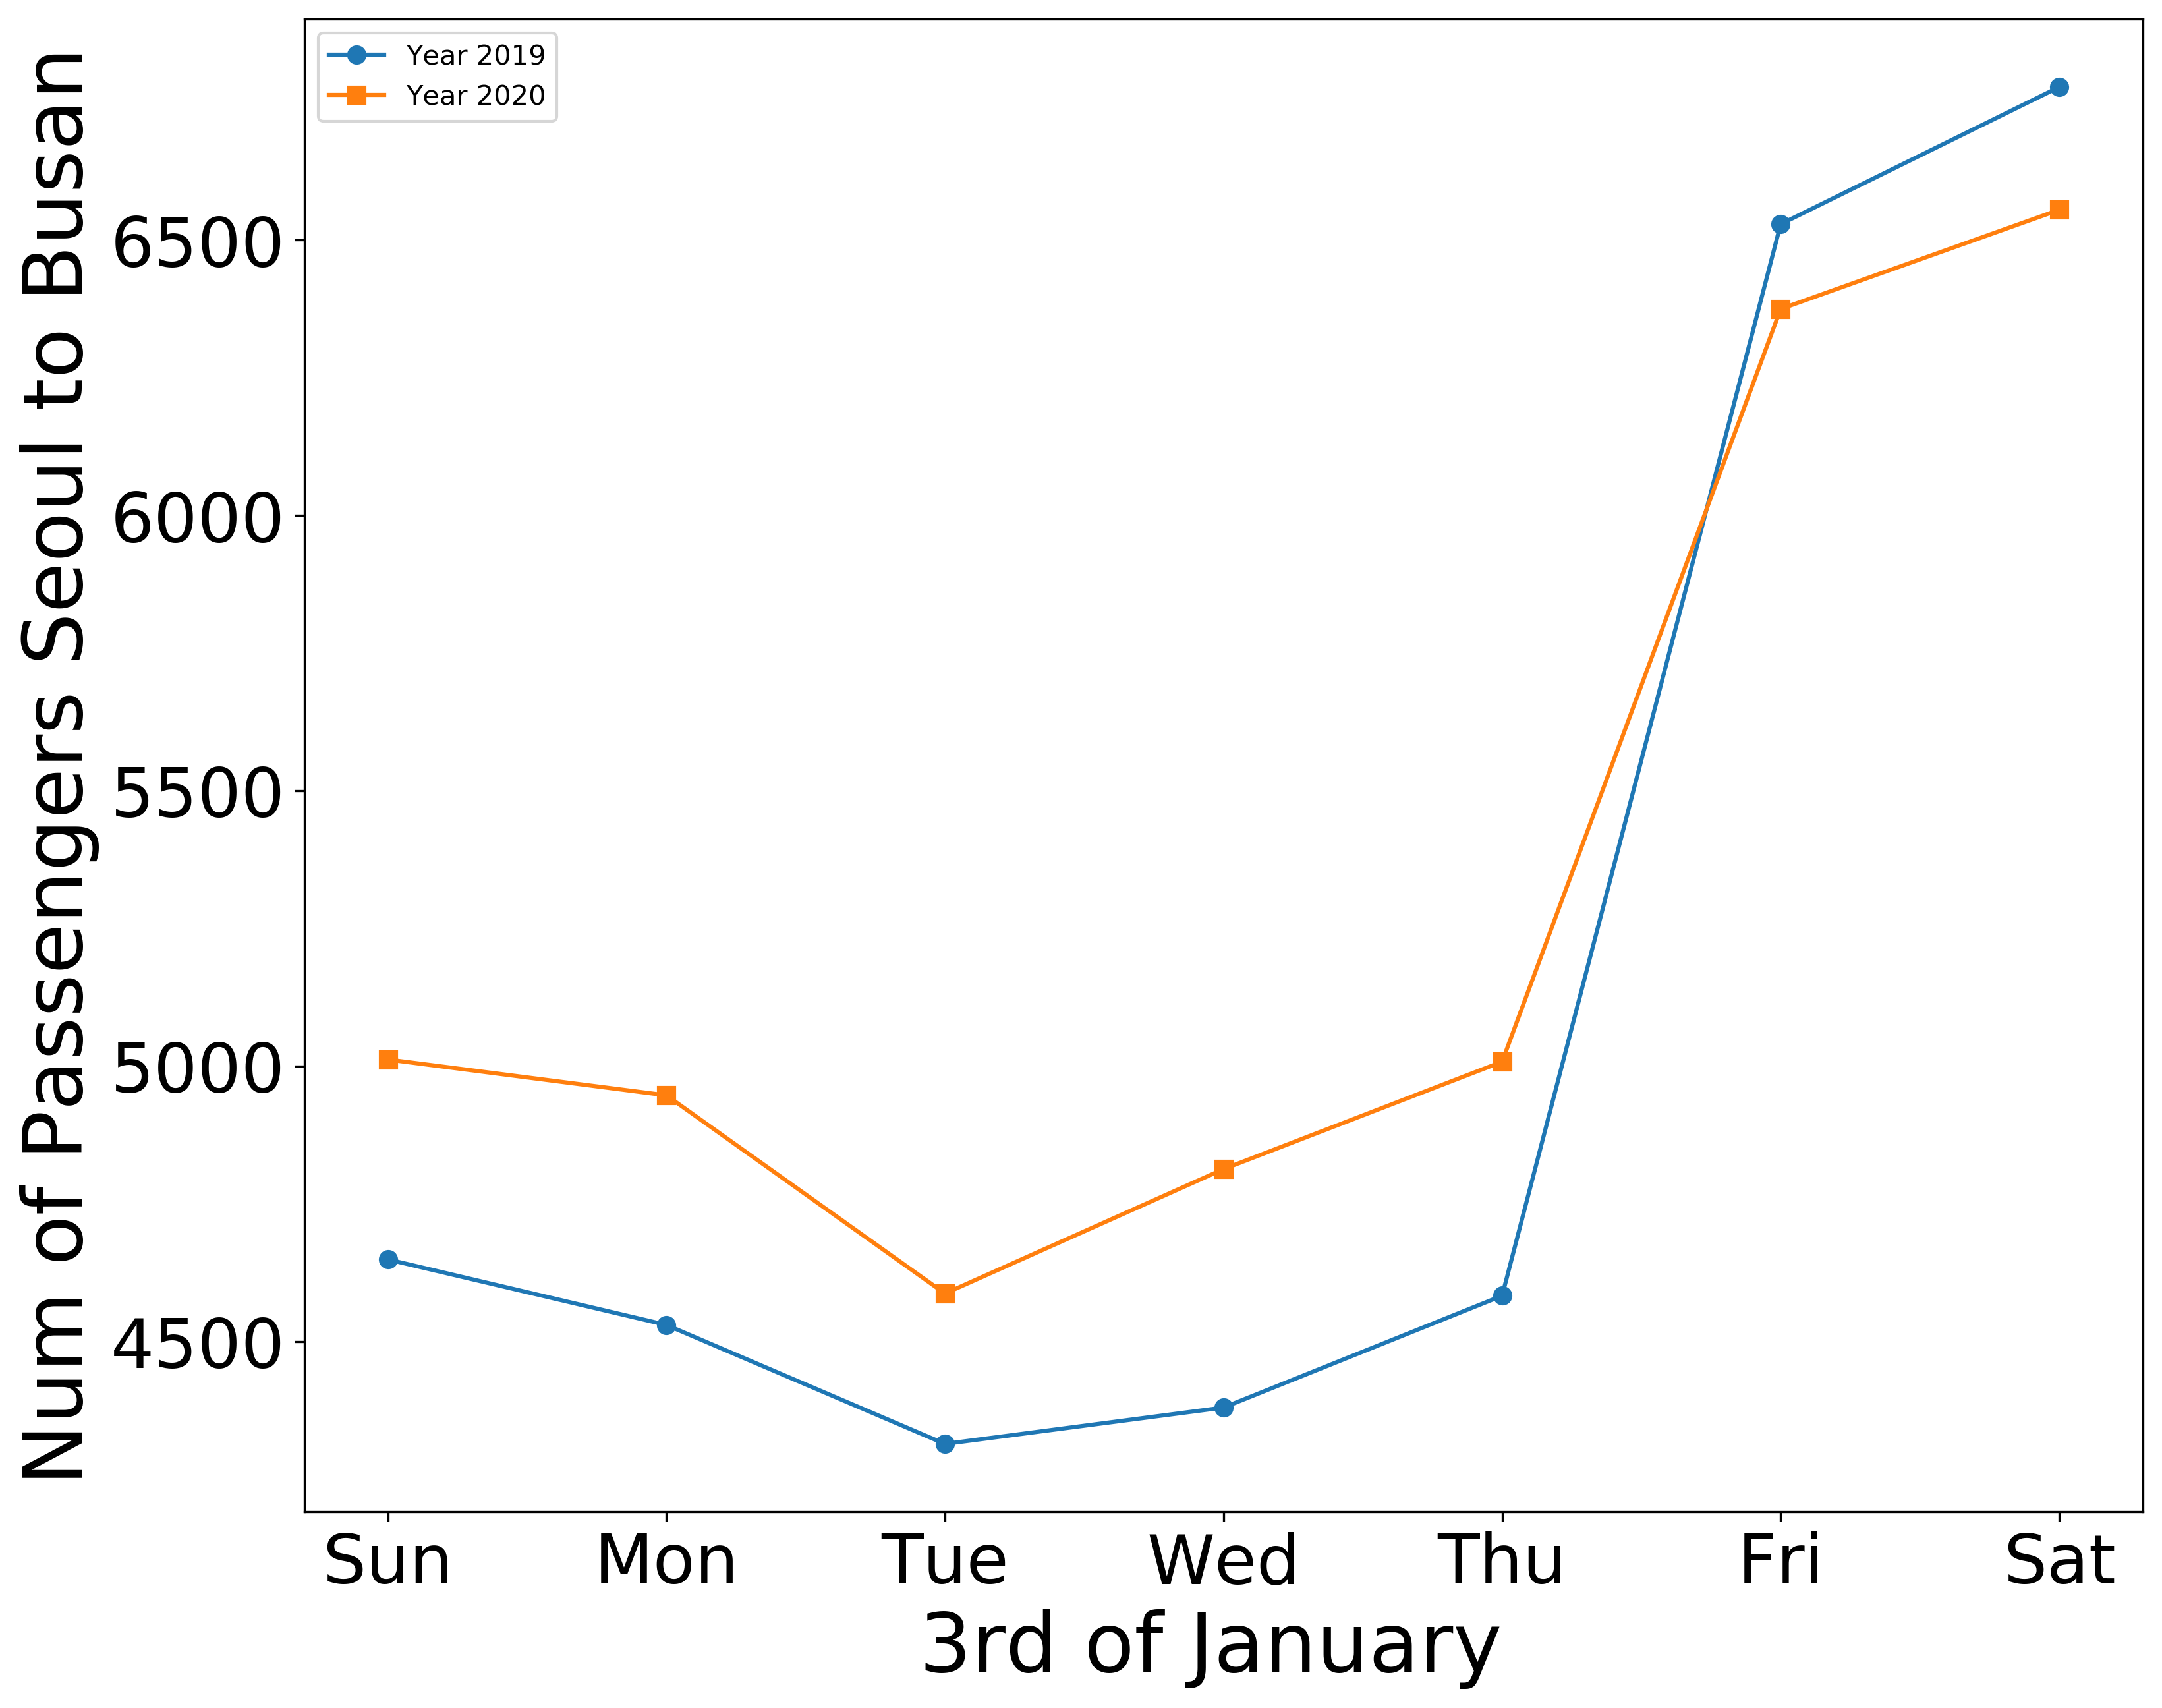

In [10]:
df_compare = pd.DataFrame(index=range(0,2), columns=['Sun', 'Mon' , 'Tue' , 'Wed', 'Thu', 'Fri', 'Sat'])
day = ['Sun', 'Mon' , 'Tue' , 'Wed', 'Thu', 'Fri', 'Sat']
df_compare = df_compare.append(pd.Series(list_2019_13, index=df_compare.columns), ignore_index=True)
df_compare = df_compare.append(pd.Series(list_2020_13, index=df_compare.columns), ignore_index=True)
df_compare = df_compare.dropna()
df_compare = df_compare.rename(index={2: 2019, 3: 2020})

plt.figure(dpi=300, figsize=(12,10))

plt.plot(day, list_2019_13, marker='o')
plt.plot(day, list_2020_13, marker='s')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('3rd of January ', fontsize=30)
plt.ylabel('Num of Passengers Seoul to Busan', fontsize=30)
plt.legend(['Year 2019', 'Year 2020'])

plt.show()

In [11]:
df_compare

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
2019,4649,4530,4314,4380,4583,6529,6778
2020,5012,4947,4587,4813,5008,6375,6555
